Shape: (5000, 12)

 Column Types:
 Policy_ID         object
Device_Type       object
Brand             object
Retail_Price     float64
Plan_Duration      int64
Vendor            object
Region            object
Customer_Age       int64
Sales_Channel     object
Claim_Made         int64
Claim_Cost       float64
Plan_Price       float64
dtype: object

 Missing Values:
 Policy_ID        0
Device_Type      0
Brand            0
Retail_Price     0
Plan_Duration    0
Vendor           0
Region           0
Customer_Age     0
Sales_Channel    0
Claim_Made       0
Claim_Cost       0
Plan_Price       0
dtype: int64

 Cleaned file saved to: ../data/processed/device_insurance_data_enriched.csv

 Overall Claim Rate: 24.68%


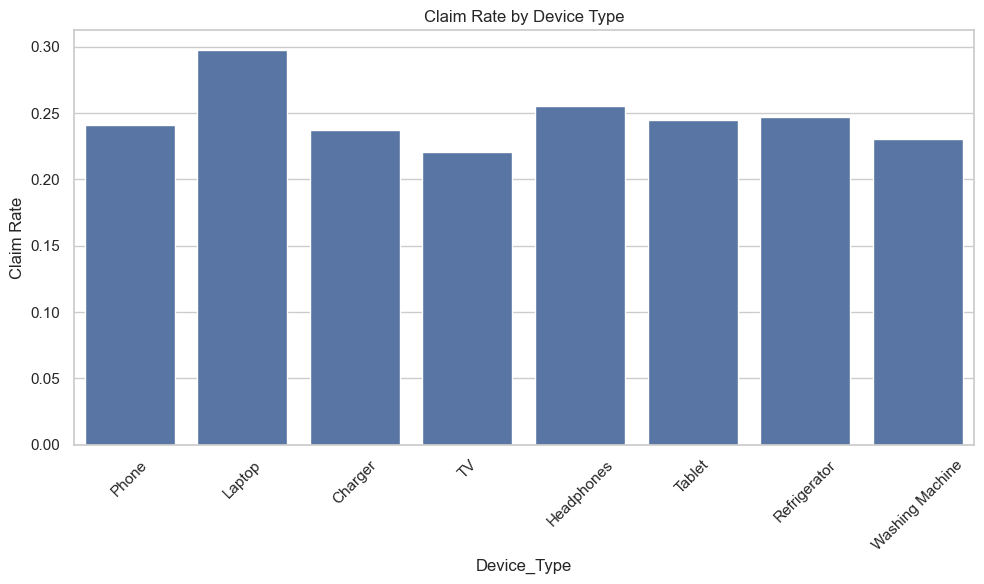

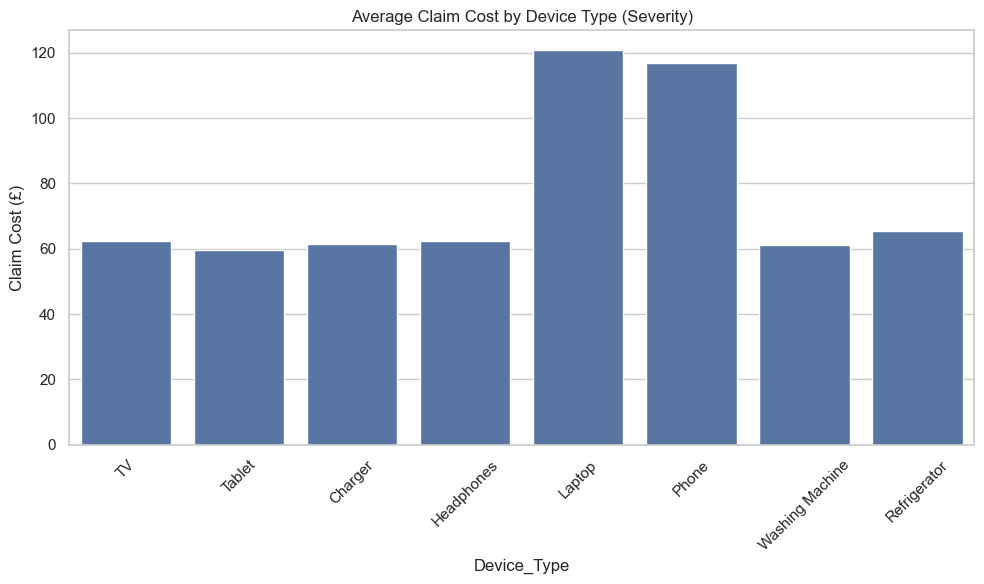

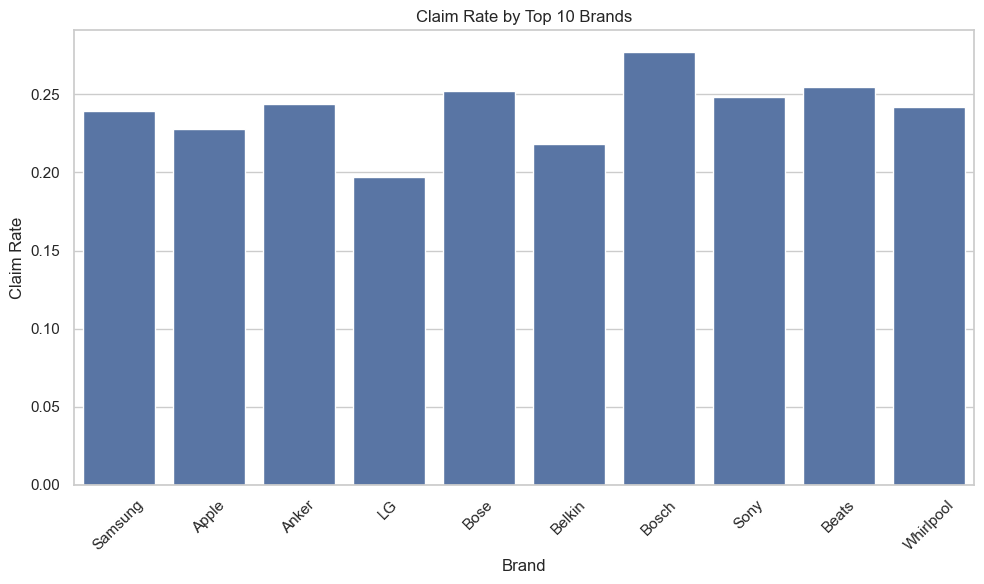

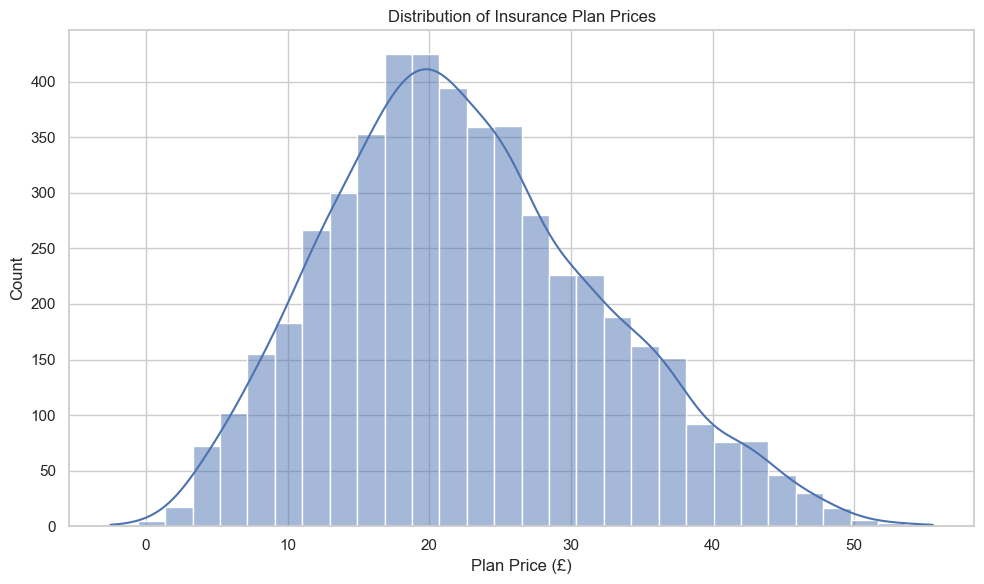

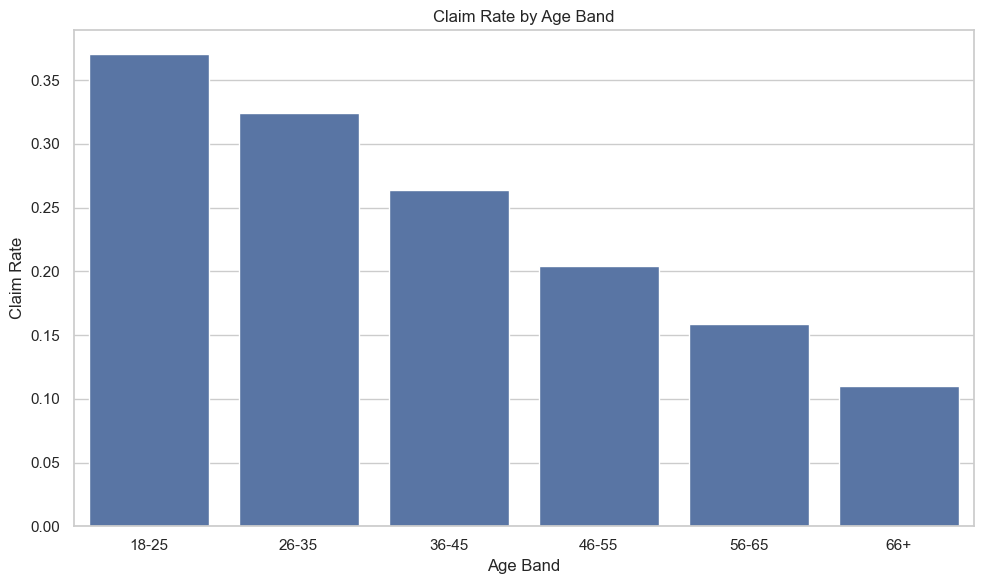

In [7]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Step 2: Load Dataset
df = pd.read_csv('../data/raw/device_insurance_portfolio_uk.csv')

# Step 3: Basic Checks
print("Shape:", df.shape)
print("\n Column Types:\n", df.dtypes)
print("\n Missing Values:\n", df.isnull().sum())

# Step 4: Enrichment – Age Band Creation
df['Age_Band'] = pd.cut(
    df['Customer_Age'],
    bins=[17, 25, 35, 45, 55, 65, 80],
    labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
)

# Step 5: Save Cleaned Dataset for Modeling
df.to_csv('../data/processed/device_insurance_data_enriched.csv', index=False)
print("\n Cleaned file saved to: ../data/processed/device_insurance_data_enriched.csv")

# Step 6: Claim Rate Overview
claim_rate = df['Claim_Made'].mean()
print(f"\n Overall Claim Rate: {claim_rate:.2%}")

# Step 7: Claim Rate by Device Type
sns.barplot(x='Device_Type', y='Claim_Made', data=df, estimator=np.mean, errorbar=None)
plt.xticks(rotation=45)
plt.title('Claim Rate by Device Type')
plt.ylabel('Claim Rate')
plt.tight_layout()
plt.show()

# Step 8: Avg Claim Cost by Device Type (Severity)
severity = df[df['Claim_Made'] == 1]
sns.barplot(x='Device_Type', y='Claim_Cost', data=severity, estimator=np.mean, errorbar=None)
plt.xticks(rotation=45)
plt.title('Average Claim Cost by Device Type (Severity)')
plt.ylabel('Claim Cost (£)')
plt.tight_layout()
plt.show()

# Step 9: Claim Rate by Brand
top_brands = df['Brand'].value_counts().head(10).index
sns.barplot(x='Brand', y='Claim_Made', data=df[df['Brand'].isin(top_brands)], estimator=np.mean, errorbar=None)
plt.xticks(rotation=45)
plt.title('Claim Rate by Top 10 Brands')
plt.ylabel('Claim Rate')
plt.tight_layout()
plt.show()

# Step 10: Plan Price Distribution
sns.histplot(df['Plan_Price'], bins=30, kde=True)
plt.title('Distribution of Insurance Plan Prices')
plt.xlabel('Plan Price (£)')
plt.tight_layout()
plt.show()

# Step 11: Claim Rate by Customer Age Band
age_claim = df.groupby('Age_Band', observed=True)['Claim_Made'].mean()
sns.barplot(x=age_claim.index, y=age_claim.values, errorbar=None)
plt.title('Claim Rate by Age Band')
plt.ylabel('Claim Rate')
plt.xlabel('Age Band')
plt.tight_layout()
plt.show()